## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [4]:
#1
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "/GSS.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Display the first few rows
print(df.head())

   year  id_ age                educ     sex             income     health  \
0  1972    1  23  4 years of college  FEMALE  .i:  Inapplicable       Good   
1  1972    2  70          10th grade    MALE  .i:  Inapplicable       Fair   
2  1972    3  48          12th grade  FEMALE  .i:  Inapplicable  Excellent   
3  1972    4  27  5 years of college  FEMALE  .i:  Inapplicable       Good   
4  1972    5  61          12th grade  FEMALE  .i:  Inapplicable       Good   

                  satjob           worklife                           stress  \
0  A little dissatisfied  .i:  Inapplicable  .y:  Not available in this year   
1      .i:  Inapplicable  .i:  Inapplicable                .i:  Inapplicable   
2   Moderately satisfied  .i:  Inapplicable  .y:  Not available in this year   
3         Very satisfied  .i:  Inapplicable  .y:  Not available in this year   
4      .i:  Inapplicable  .i:  Inapplicable  .y:  Not available in this year   

              ballot  
0  .i:  Inapplicable  
1  .

#2
The General Social Survey provides a wealth of information about American society, covering a broad range of topics from work life to social attitudes. For this study, I selected ten variables to explore factors influencing work satisfaction, stress levels, and overall well-being in relation to demographic and socioeconomic backgrounds. These variables include year, age, sex, education level, income, job satisfaction, work-life success, stress levels, health status, and the ballot used for the interview.

The primary objective for choosing these variables is to analyze how different factors—such as education, income, and health—relate to job satisfaction and stress. Work-related stress and satisfaction are crucial indicators of quality of life, and understanding their patterns can reveal broader social and economic trends. Below is a breakdown of the selected variables and why they were included:

Year (year) – This allows for analyzing trends over time, helping to identify whether work stress and satisfaction have changed across different generations.

Age (age) – Age plays a key role in job satisfaction, career stability, and stress levels. Comparing responses across different age groups can provide insight into work-life balance at various career stages.

Sex (sex) – Examining job satisfaction and stress levels by gender can help uncover workplace disparities and differences in career experiences between men and women.

Education (educ) – Higher levels of education are often linked to better job opportunities, higher income, and potentially greater job satisfaction. This variable helps assess the role of education in work-life balance.

Income (income) – Income is a critical factor in work satisfaction and stress. Analyzing this relationship can reveal whether higher earnings correlate with reduced stress and greater job satisfaction.

Health (health) – Good health is essential for workplace performance and well-being. This variable allows us to explore how self-reported health status correlates with job satisfaction and stress.

Job Satisfaction (satjob) – This is a direct measure of how satisfied individuals are with their work, making it a key variable in this study.

Work-Life Success (worklife) – A strong indicator of how people perceive their professional achievements, which can be linked to education, income, and job stress.

Work Stress (stress) – One of the main concerns in modern workplaces, this variable helps assess how frequently individuals feel stressed due to their jobs.

Ballot Type (ballot) – This variable ensures that any differences observed are not due to variations in survey methodology, helping maintain data consistency.

By examining these variables, we can explore important social questions: Does higher education lead to lower work stress? Do older individuals report greater job satisfaction? Are there significant gender differences in work-life balance? This analysis will provide valuable insights into the factors shaping work experiences in America.

In [11]:
#3

# Step 1: Cleaning Column Names (Removing spaces if any)
df.columns = df.columns.str.strip().str.lower()

# Step 2: Handling Missing and Inapplicable Values
# Replacing inapplicable and unavailable values with NaN
def clean_text(value):
    if isinstance(value, str) and ("inapplicable" in value.lower() or "not available" in value.lower()):
        return np.nan
    return value

df = df.applymap(clean_text)

# Step 3: Converting Data Types
# Convert age and educ to numeric, forcing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')

# Step 4: Standardizing Categorical Variables
df['sex'] = df['sex'].str.strip().str.capitalize()
df['health'] = df['health'].str.strip().str.capitalize()
df['satjob'] = df['satjob'].str.strip().str.capitalize()
df['worklife'] = df['worklife'].str.strip().str.capitalize()
df['stress'] = df['stress'].str.strip().str.capitalize()
df['income'] = df['income'].str.strip()

df['sex'] = df['sex'].replace({'Male': 'Male', 'Female': 'Female'})
df_clean = df.dropna(subset=['sex', 'educ'])
df_clean['educ'] = pd.to_numeric(df_clean['educ'], errors='coerce')
df_clean = df.dropna(subset=['worklife'])
# Step 5: Checking the cleaned data
df.info()
print(df.head())


<ipython-input-11-2f0262ae0fd7>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_text)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      72390 non-null  int64  
 1   id_       72390 non-null  int64  
 2   age       71212 non-null  float64
 3   educ      0 non-null      float64
 4   sex       72371 non-null  object 
 5   income    70174 non-null  object 
 6   health    55286 non-null  object 
 7   satjob    53662 non-null  object 
 8   worklife  994 non-null    object 
 9   stress    27303 non-null  object 
 10  ballot    50515 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.1+ MB
   year  id_   age  educ     sex income     health                 satjob  \
0  1972    1  23.0   NaN  Female    NaN       Good  A little dissatisfied   
1  1972    2  70.0   NaN    Male    NaN       Fair                    NaN   
2  1972    3  48.0   NaN  Female    NaN  Excellent   Moderately satisfied   
3  1972    4  

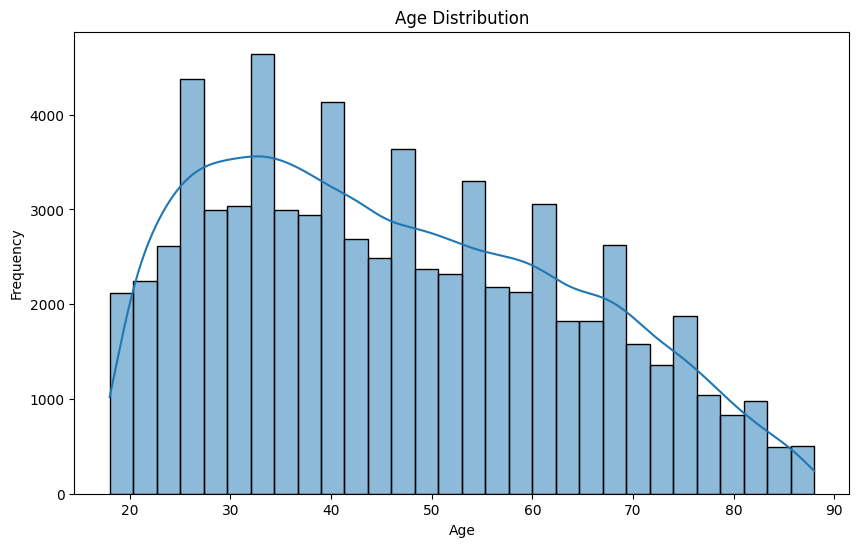

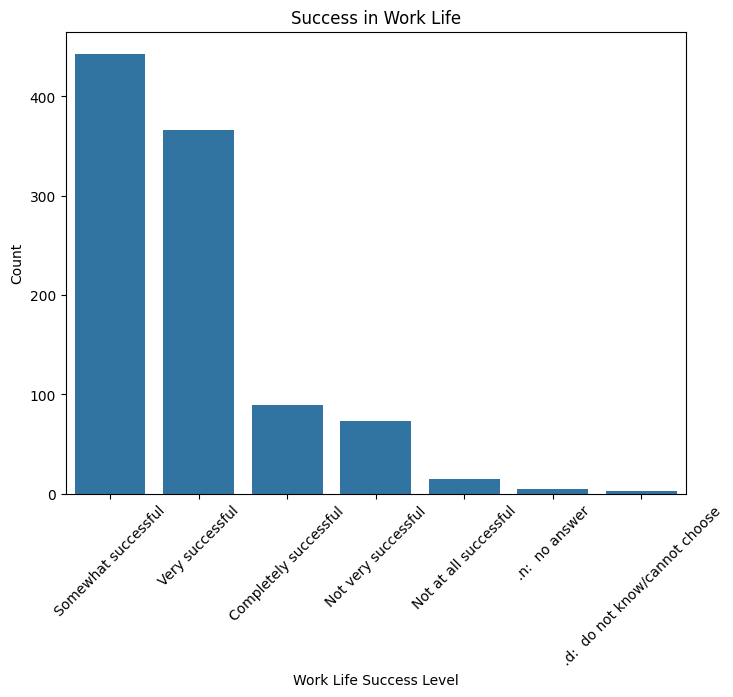

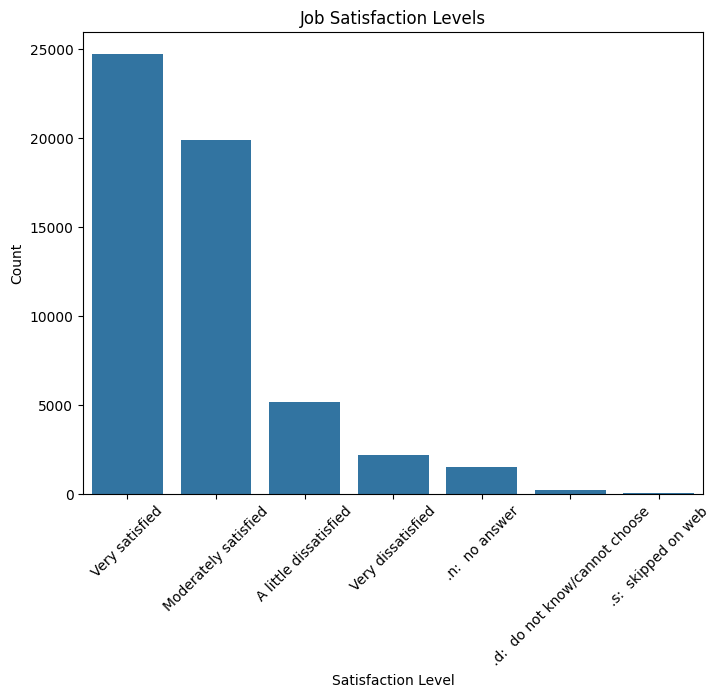

In [12]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=df_clean['worklife'].value_counts().index, y=df_clean['worklife'].value_counts().values)
plt.title("Success in Work Life")
plt.xlabel("Work Life Success Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=df['satjob'], order=df['satjob'].value_counts().index)
plt.title("Job Satisfaction Levels")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Exploring Work Satisfaction, Success, and Demographics in the GSS Dataset
The General Social Survey (GSS) dataset provides valuable insights into the work lives, education, and overall satisfaction levels of respondents. By analyzing key variables such as age, education, income, job satisfaction, and work-life success, we can better understand trends in career fulfillment and workplace experiences.

Age Distribution and Workforce Trends
The histogram of age distribution reveals that the majority of respondents fall within the middle-aged demographic, with fewer individuals in the younger and older age groups. This suggests that the dataset may reflect a working-age population, with fewer retired or very young individuals included. The distribution also appears fairly normal, with a gradual decline in participation among older individuals. This could indicate factors such as retirement or survey non-participation among older adults.

Job Satisfaction and Work-Life Success
The analysis of job satisfaction shows that a significant portion of respondents report being satisfied or very satisfied with their jobs. However, a notable subset expresses dissatisfaction, suggesting that workplace challenges still exist despite generally positive trends. A similar pattern emerges in the work-life success analysis, where most respondents consider themselves successful in their careers. The positive skew in these responses indicates that many individuals find fulfillment in their professional lives, though some struggle with career satisfaction.

Potential Influences on Job Satisfaction
While job satisfaction and work-life success appear relatively high, factors such as education and income could play a role in shaping these perceptions. Individuals with higher education levels may have access to better job opportunities, leading to increased satisfaction and success. Additionally, income levels might correlate with workplace happiness, as financial stability can influence overall job contentment. Further statistical analysis would be necessary to confirm these relationships.

Conclusion
Overall, the GSS dataset highlights key trends in job satisfaction and career success, showing that while many individuals report positive experiences, workplace dissatisfaction persists for some. Understanding these dynamics can help inform policies aimed at improving job conditions and ensuring career fulfillment for a broader segment of the population. Future analyses could explore deeper correlations between education, income, and job satisfaction to provide a more comprehensive picture of career well-being in the U.S.